In [1]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

c:\Users\NongNam\Documents\AI_Builder\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset you created
df = pd.read_csv("descriptor.csv")
df = df.copy()
df = df[df['Kd'].notnull()]  # Remove NaN
df = df[np.isfinite(df['Kd'])]  # Remove inf/-inf

train_data = df

In [3]:
# Create AutoGluon predictor for regression (use MSE as metric, for example)
predictor = TabularPredictor(
    label='Kd',  # or 'Kd' depending on your target transform
    problem_type='regression',
    eval_metric='mean_squared_error',
    path='Model/'
).fit(
    train_data=train_data,
    presets='best_quality',
    num_bag_folds=5,
    num_stack_levels=2,
    time_limit=7200
)

predictor.leaderboard(silent=True)

Verbosity: 2 (Standard Logging)


=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
Memory Avail:       0.64 GB / 7.42 GB (8.6%)
Disk Space Avail:   4.50 GB / 262.54 GB (1.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used 

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L4,-1.410327,mean_squared_error,53.173491,4532.661990,0.007329,6.778260,4,True,29
1,WeightedEnsemble_L3,-1.411537,mean_squared_error,38.787255,3767.581418,0.005005,2.221590,3,True,21
2,NeuralNetFastAI_BAG_L3,-1.415186,mean_squared_error,49.445837,4291.130004,9.009062,358.108074,3,True,26
3,CatBoost_BAG_L3,-1.415648,mean_squared_error,40.610206,4128.771682,0.173431,195.749752,3,True,25
4,CatBoost_BAG_L2,-1.430415,mean_squared_error,22.061650,2537.416020,0.151310,326.009871,2,True,15
5,NeuralNetFastAI_BAG_L2,-1.438657,mean_squared_error,27.926294,2774.403714,6.015954,562.997566,2,True,17
6,WeightedEnsemble_L2,-1.442786,mean_squared_error,6.770854,1171.941424,0.008843,2.733540,2,True,11
7,CatBoost_BAG_L1,-1.462201,mean_squared_error,0.666899,1085.058513,0.666899,1085.058513,1,True,6
8,RandomForestMSE_BAG_L2,-1.465829,mean_squared_error,26.196693,2249.531099,4.286353,38.124950,2,True,14
9,XGBoost_BAG_L1,-1.468235,mean_squared_error,1.521054,66.482510,1.521054,66.482510,1,True,8


In [4]:
# Load your test dataset (CSV or other)
test_data = pd.read_csv('descriptor_test.csv')

# Optional: If your test set includes the target column, keep a copy
y_test = test_data['Kd']
test_data_nolabel = test_data.drop(columns=['Kd'])

In [5]:
# load model
predictor = TabularPredictor.load('Model/')


In [6]:
# Predict using the loaded model
predictions = predictor.predict(test_data_nolabel)

# Show predictions
print(predictions)

performance = predictor.evaluate(test_data)
y_pred = predictor.predict(test_data_nolabel)
print(performance)

0       5.715560
1       5.330175
2       6.282209
3       5.999542
4       8.114770
          ...   
6094    6.677073
6095    7.873157
6096    5.962394
6097    5.243572
6098    5.491762
Name: Kd, Length: 6099, dtype: float32
{'mean_squared_error': -1.4218183325641964, 'root_mean_squared_error': -1.1924002400889546, 'mean_absolute_error': -0.8877608087171371, 'r2': 0.45473305048791546, 'pearsonr': 0.6748824501679412, 'median_absolute_error': -0.6191546724236812}


C:\Users\NongNam\AppData\Local\Temp\ipykernel_19112\897430231.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="True Kd", shade=True)
C:\Users\NongNam\AppData\Local\Temp\ipykernel_19112\897430231.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Kd", shade=True)


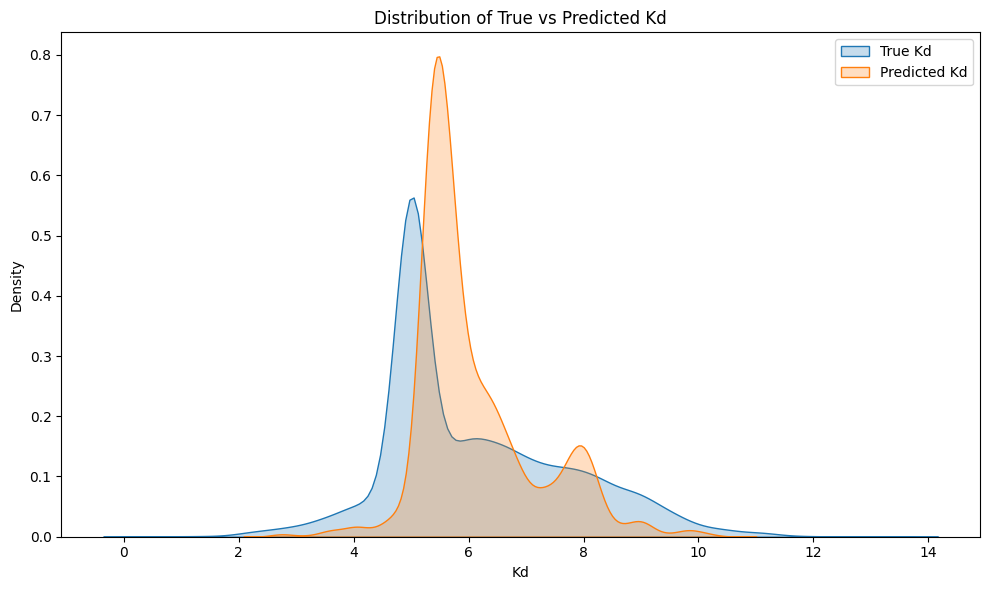

2025-06-02 01:49:14,334	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-06-02 01:49:14,353	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot real vs predicted distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="True Kd", shade=True)
sns.kdeplot(y_pred, label="Predicted Kd", shade=True)
plt.title("Distribution of True vs Predicted Kd")
plt.xlabel("Kd")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()